### 이미지 처리 기초
https://datascienceschool.net/view-notebook/9af8d8e93c084bc49f0ac2bb8a20e2a4/

### HSV
HSV(Hue, Saturation, Value) 색공간에서는 색이 다음 세가지 값으로 표현된다.

- 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.   

아래 코드는 채도가 100일 때의 색공간을 시각화 한 것이다.

In [2]:
import pandas as pd
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import cv2 as cv
import colour

In [163]:
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)
# V : (100행, 360열) 동일 행의 값들이 다 똑같음
# H : (100행, 360열) 동일 열의 값들이 다 똑감음
# S : (100행, 360열) 모든 값이 1

HSV_S100 = np.dstack((H, S * 1.0, V)) # 명도값 전부 100%로 넣음
# HSV (100행, 360열, 3면)

RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

print(HSV_S20[:1, :, :].shape)
HSV_S20[:1, :2, :]

(1, 360, 3)


array([[[ 0.        ,  0.2       ,  0.        ],
        [ 0.00278552,  0.2       ,  0.        ]]])

C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\LG\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  fon

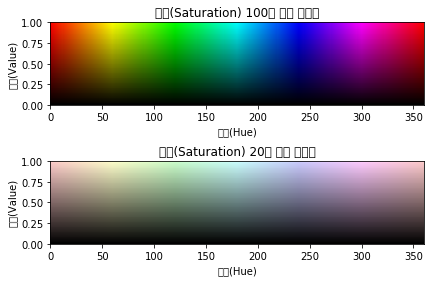

In [164]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

0.48, 0.53, 0.85
0.40, 0.85, 0.78
HSV : [[[ 0.47632312  0.53        0.852     ]]], Shape : (1, 1, 3)
RGB : [[[ 0.40044     0.852       0.78785081]]], Shape : (1, 1, 3)


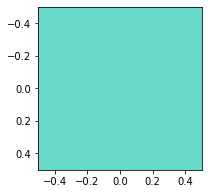

In [169]:
# HSV 값 시각화하기

# 색 입력은 3차원 배열로 각 0~1 값으로 입력
# h : ÷359 / s : ÷100 / v : ÷100

h, s, v = 171.0/359, 53.0/100, 85.2/100
r, g, b = 102/255, 217/255, 200/255
print("{0:.2f}, {1:.2f}, {2:.2f}".format(h, s, v))
print("{0:.2f}, {1:.2f}, {2:.2f}".format(r, g, b))

HSV = np.array([[[h, s, v]]])
RGB = hsv_to_rgb(HSV)
print("HSV : {}, Shape : {}".format(HSV, HSV.shape))
print("RGB : {}, Shape : {}".format(RGB, RGB.shape))

plt.figure(figsize=(3, 3))
plt.imshow(RGB)